# Data Import and Setup

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
url_data = (r'https://raw.githubusercontent.com/SucrazyGit/DS-Demo/refs/heads/main/crop_yield_data.csv')
data = pd.read_csv(url_data)
data.head()

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
0,1626,9,636,11,1006,404
1,1959,9,73,11,112,115
2,1360,1,352,5,702,231
3,1794,2,948,7,299,537
4,1630,5,884,5,2733,554


In [3]:
data.describe()

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1263.095000,5.506667,498.801000,7.995333,1549.450333,328.099000
std,432.371756,2.855172,287.122742,2.621501,814.326919,145.036503
min,500.000000,1.000000,10.000000,4.000000,100.000000,46.000000
25%,896.000000,3.000000,242.000000,6.000000,869.750000,199.000000
50%,1277.000000,6.000000,505.000000,8.000000,1542.000000,332.000000
75%,1636.000000,8.000000,741.000000,10.000000,2225.000000,455.000000
max,2000.000000,10.000000,1000.000000,12.000000,3000.000000,628.000000


# Exploratory Data Analysis

Text(0.5, 1.0, 'Variable Correlation Heat Map')

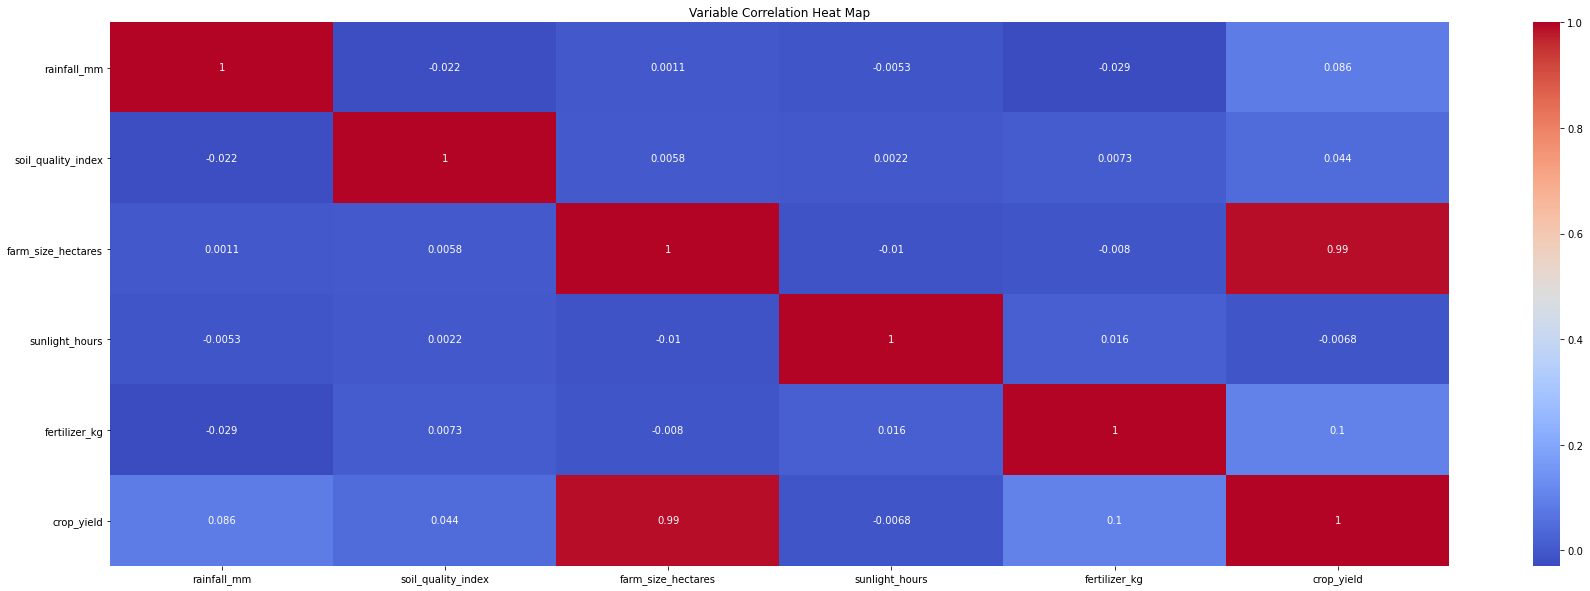

In [4]:
plt.figure(figsize=(30, 10))
s = data.corr()
sns.heatmap(s, annot=True, cmap='coolwarm')
plt.title('Variable Correlation Heat Map')

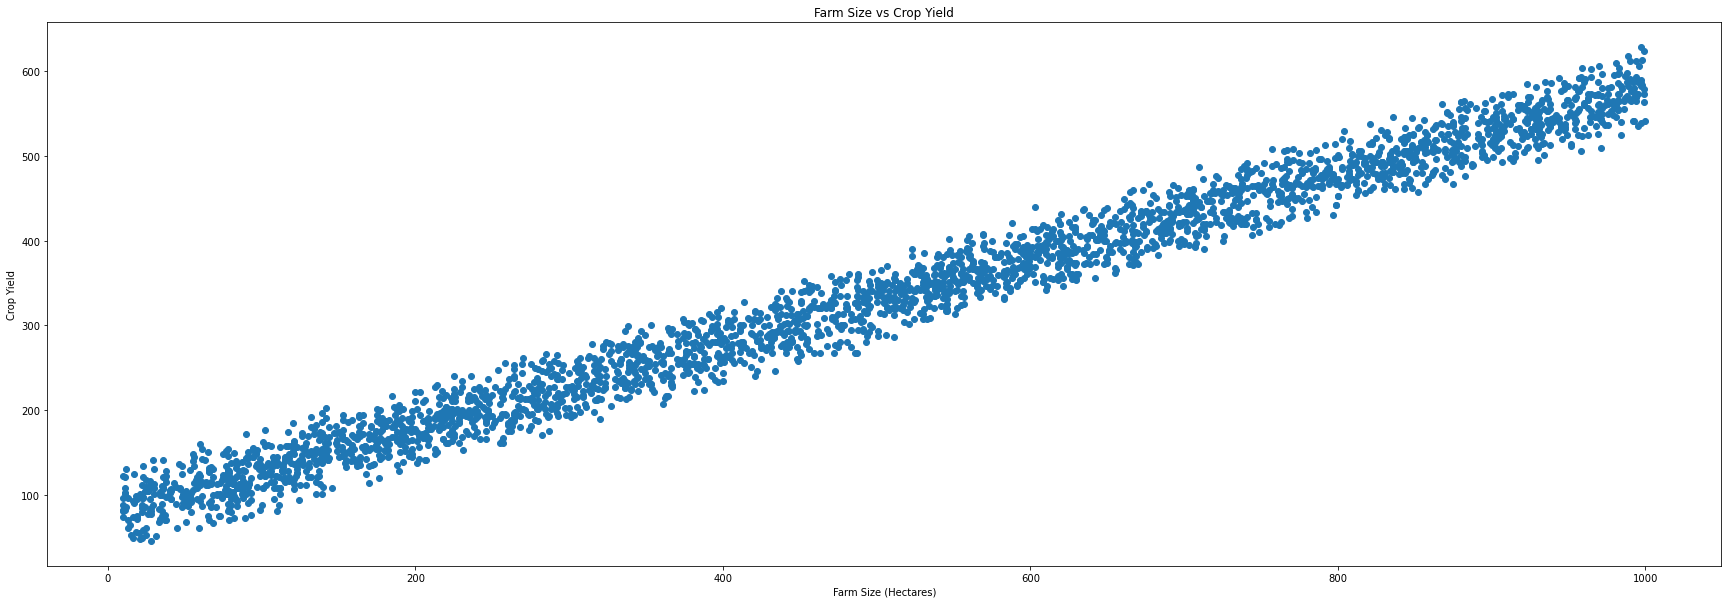

In [5]:
plt.figure(figsize=(30, 10))
plt.scatter(data['farm_size_hectares'], data['crop_yield'])
plt.xlabel('Farm Size (Hectares)')
plt.ylabel('Crop Yield')
plt.title('Farm Size vs Crop Yield')
plt.show()

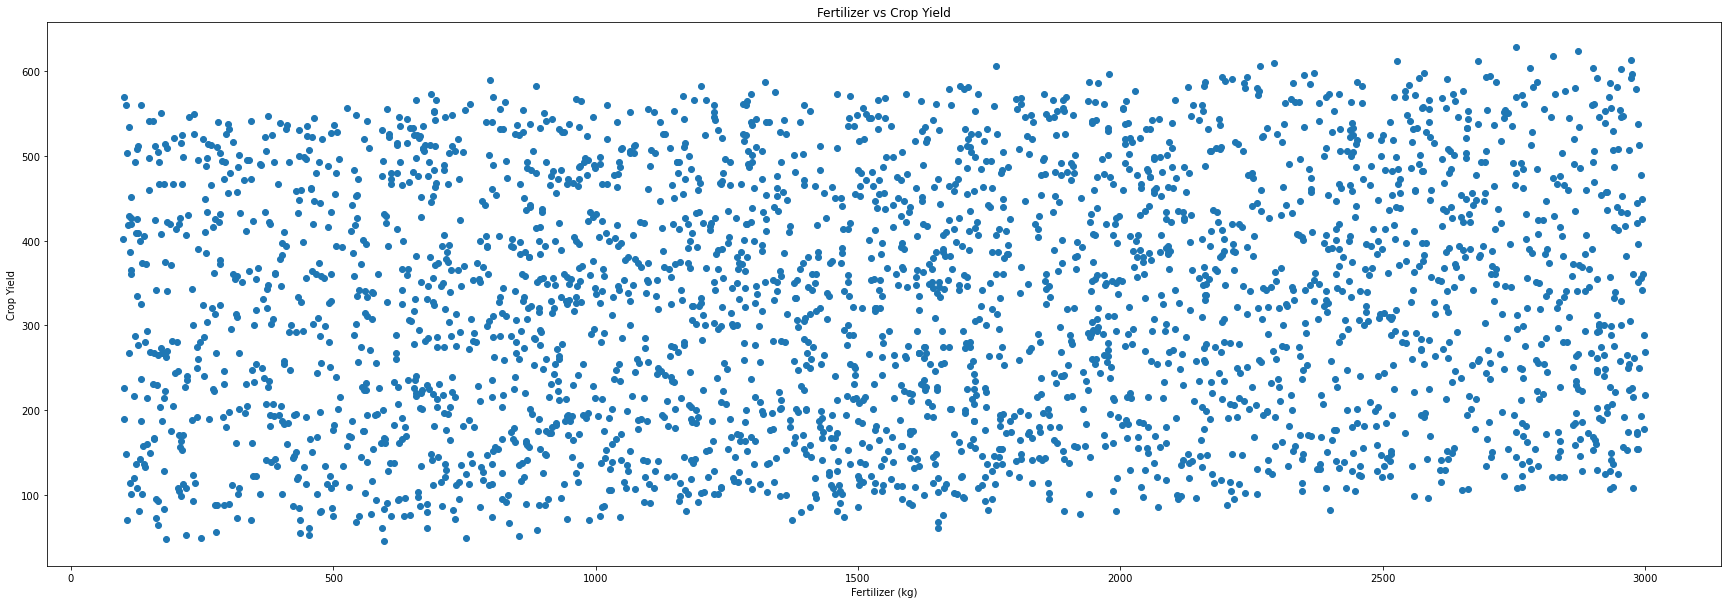

In [6]:
plt.figure(figsize=(30, 10))
plt.scatter(data['fertilizer_kg'], data['crop_yield'])
plt.xlabel('Fertilizer (kg)')
plt.ylabel('Crop Yield')
plt.title('Fertilizer vs Crop Yield')
plt.show()

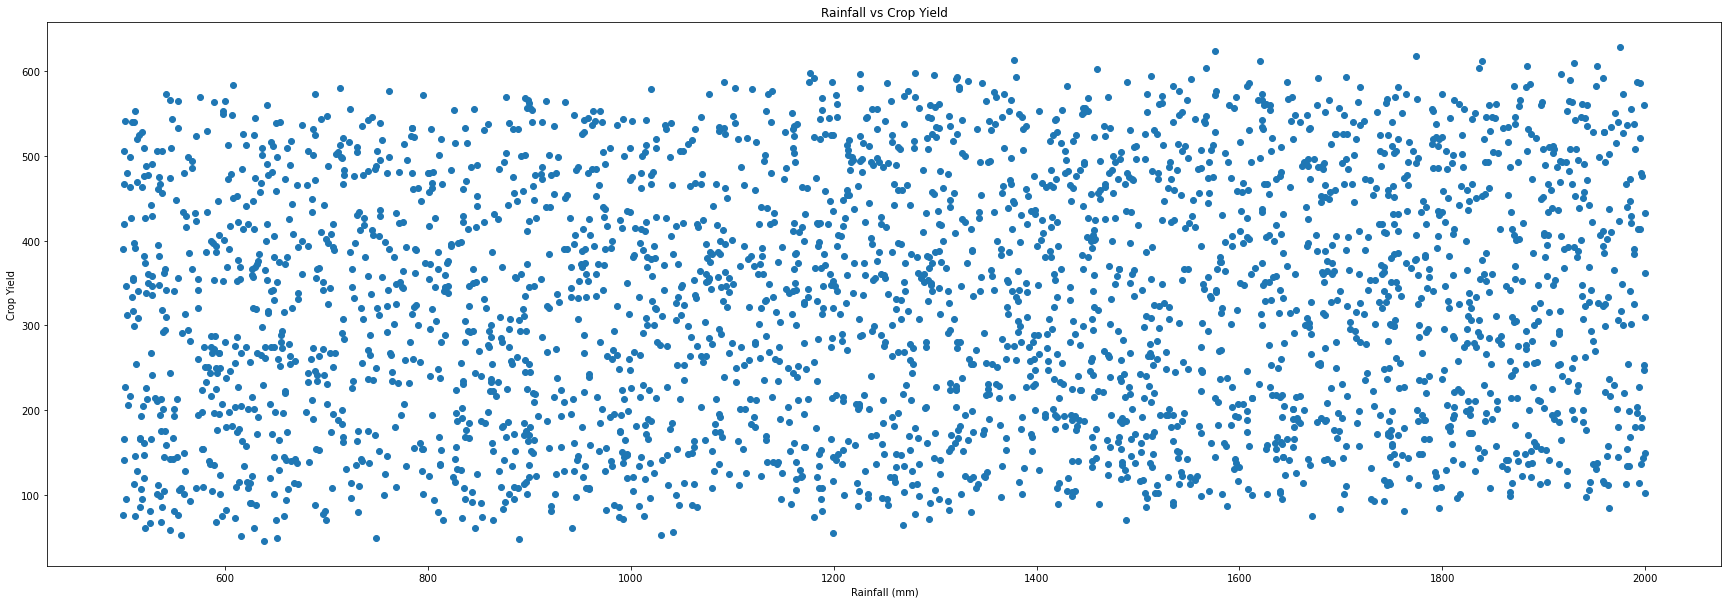

In [7]:
plt.figure(figsize=(30, 10))
plt.scatter(data['rainfall_mm'], data['crop_yield'])
plt.xlabel('Rainfall (mm)')
plt.ylabel('Crop Yield')
plt.title('Rainfall vs Crop Yield')
plt.show()

# Model Building

In [8]:
y = data['crop_yield']
x = data.drop(['crop_yield'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=9999)

In [9]:
# Building Linear Regression Model
model_linear = LinearRegression()
model_linear.fit(x_train,y_train)
y_pred_linear = model_linear.predict(x_test)

In [26]:
# Building Logistic Regression Model
model_logistic = LogisticRegression(max_iter = 5000)
model_logistic.fit(x_train,y_train)
y_pred_logistic = model_logistic.predict(x_test)

c:\Users\bmsuc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
print('Test Values:')
print(y_test.values[:5])
print('Linear Predicted Values:')
print(y_pred_linear[:5])
print('Logistic Predicted Values:')
print(y_pred_logistic[:5])


Test Values:
[300 298 298 221  97]
Linear Predicted Values:
[299.72895179 297.74620276 297.74138792 220.54029861  97.01368241]
Logistic Predicted Values:
[273 556 216 197  95]


Linear Model RMSE: 0.292
Logistic Model RMSE: 66.999


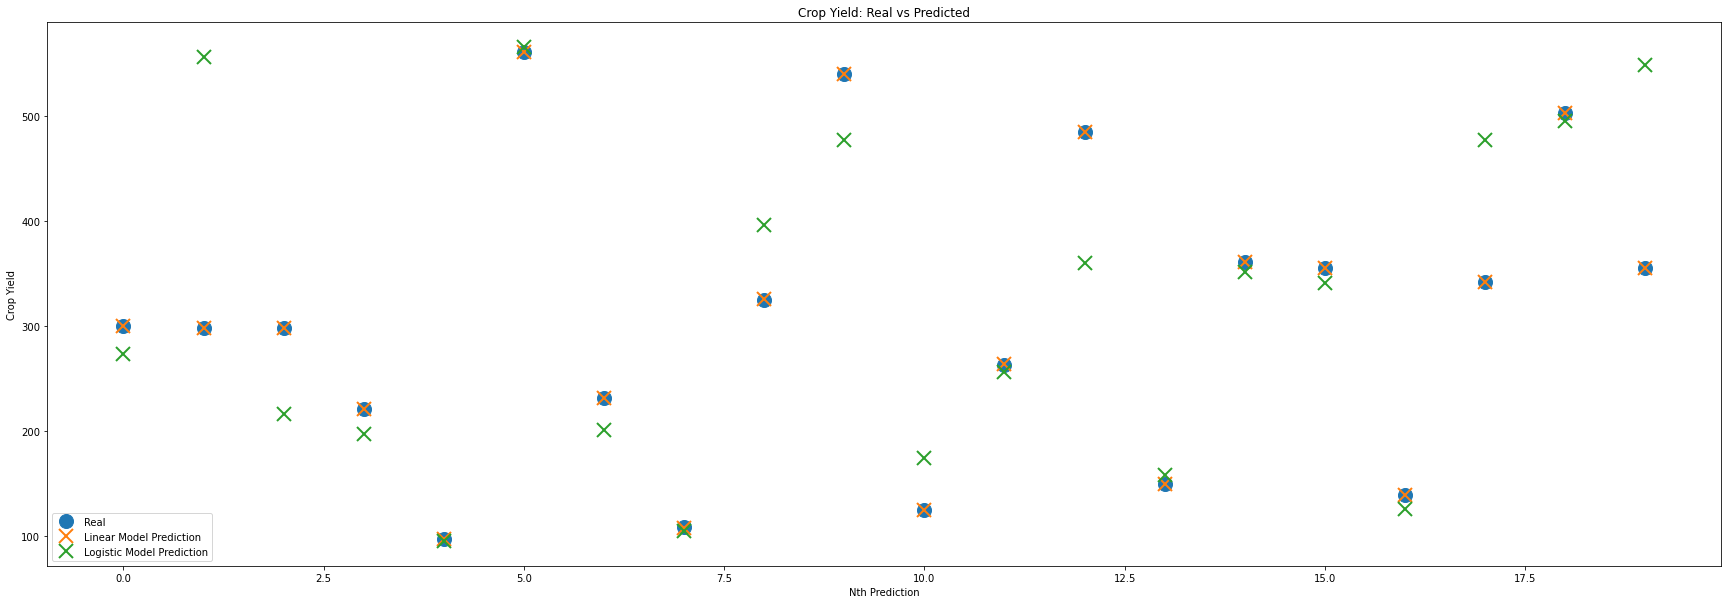

In [37]:
print('Linear Model RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_linear))))
print('Logistic Model RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_logistic))))
plt.figure(figsize=(30, 10))
plt.xlabel('Nth Prediction')
plt.ylabel('Crop Yield')
plt.plot(y_test.values[:20], 'o', label='Real', markersize=14)
plt.plot(y_pred_linear[:20], 'x', label='Linear Model Prediction', markersize=14, mew=2)
plt.plot(y_pred_logistic[:20], 'x', label='Logistic Model Prediction', markersize=14, mew=2)
plt.legend()
plt.title('Crop Yield: Real vs Predicted')
plt.show()